<a href="https://colab.research.google.com/github/Nukaraju2003/FundamentalsofMachineLearning/blob/main/k_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Experiment 7a-K Means Clustering ***


### Import the packages


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Import the data

In [2]:
data = pd.read_csv("/content/hclustdata.csv")
data.head()

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
0,ARIGELA AVINASH,0,87.3,65.3,40.00,18
1,BALADARI KEERTHANA,1,89.0,92.4,71.45,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.0,45.26,13
3,BODDU SAI BABA,0,71.0,70.4,36.47,17
4,BONDAPALLISRINIVAS,0,67.0,65.5,42.52,17


In [3]:
data.describe()

,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.418803,80.238889,80.781453,62.943111,4.111111
std,0.495485,8.882000,11.271626,12.064580,6.335148
min,0.000000,47.800000,52.200000,31.200000,0.000000
25%,0.000000,75.500000,73.400000,54.181818,0.000000
50%,0.000000,82.300000,83.600000,64.360000,0.000000
75%,1.000000,87.000000,90.000000,72.570000,7.000000
max,1.000000,93.660000,96.900000,88.100000,25.000000


### Pre-processing the data
#### Here we want to cluster students based on their Inter_diploma percentage and B.Tech percentage.

In [4]:
data1 = data.iloc[:,[3,4]].values

In [5]:
type(data1)

numpy.ndarray

In [6]:
element = data1[1, 1]
element

71.45

Text(0, 0.5, 'BTech Percentage')

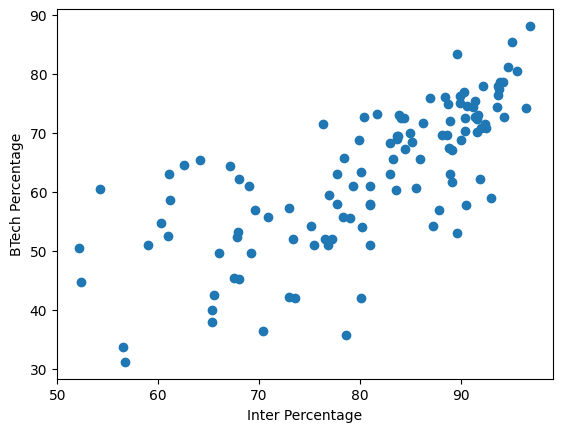

In [8]:
plt.scatter(data1[:,0], data1[:,1])
plt.xlabel("Inter Percentage")
plt.ylabel("BTech Percentage")

### Now use the Kmeans algorithm from sklearn

In [9]:
clust = KMeans(n_clusters=2)

In [10]:
model = clust.fit_predict(data1)
model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [11]:
clust.cluster_centers_

array([[88.23352113, 70.41633803],
       [69.27934783, 51.40834781]])

### Now let's visualize the data again.

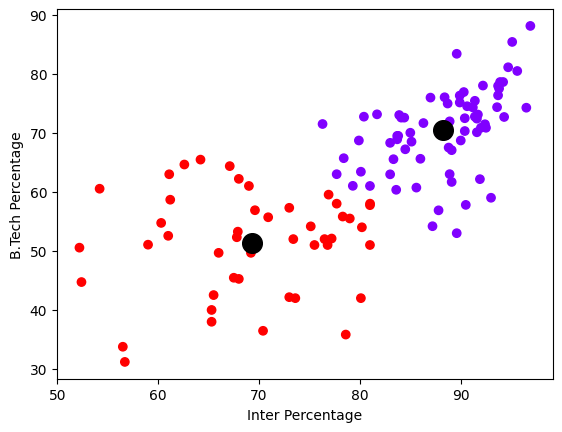

In [13]:
plt.scatter(data1[:,0],data1[:,1], c= model, cmap = 'rainbow')
plt.xlabel("Inter Percentage")
plt.ylabel("B.Tech Percentage")

centers = clust.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= 'black', s= 200)

In [15]:
data["clusters"]=pd.Series(model)
data.head()

,Na0e,Gender,SSC Perc\nentage,inter/Diplo0a perc,B.Tech perc,Back\nlogs,clusters
0,ARIGELA AVINASH,0,87.3,65.3,40.00,18,1
1,BALADARI KEERTHANA,1,89.0,92.4,71.45,0,0
2,BAVIRISETTI PRAVALIKA,1,67.0,68.0,45.26,13,1
3,BODDU SAI BABA,0,71.0,70.4,36.47,17,1
4,BONDAPALLISRINIVAS,0,67.0,65.5,42.52,17,1


### How to find the correct value of K?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

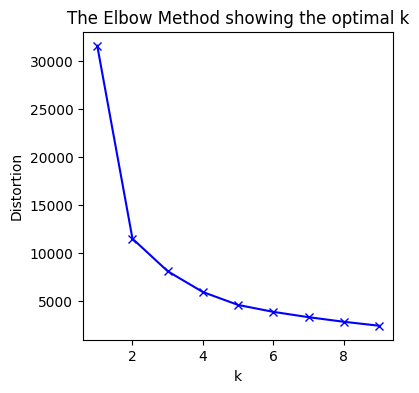

In [17]:
distortions = []
K = range(1,10)
for k in K:
  KmeanModel = KMeans(n_clusters=k)
  KmeanModel.fit(data1)
  distortions.append(KmeanModel.inertia_)

plt.figure(figsize = (4,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()